In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from src import functions



## Import Data

In [2]:
data = pd.read_csv("customers.csv")

## Cleaning Dataset to keep only active loyal members

In [3]:

    data_sorted = data[data['Churn'] == 'Yes'].reset_index()
    data_sorted.drop(columns="customerID", inplace=True)  # usless data

## Description of the dataset.
### In order to be able to work with our dataset, we must know its contents, size, columns, columns type and so on...
    

In [4]:
functions.describe_dataset(data_sorted)

   index  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0      2    Male              0      No         No       2          Yes   
1      4  Female              0      No         No       2          Yes   
2      5  Female              0      No         No       8          Yes   
3      8  Female              0     Yes         No      28          Yes   
4     13    Male              0      No         No      49          Yes   

  MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0            No             DSL            Yes  ...               No   
1            No     Fiber optic             No  ...               No   
2           Yes     Fiber optic             No  ...              Yes   
3           Yes     Fiber optic             No  ...              Yes   
4           Yes     Fiber optic             No  ...              Yes   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No             

### We see that total charges is an object but it should be a float, so we check the min to spot empty value. 
### Then if every value is defined we can convert the column to float

In [5]:
    
    print("Total charges min: ", data_sorted["TotalCharges"].min())
    data_sorted["TotalCharges"] = data_sorted["TotalCharges"].astype("float64")
    print(data_sorted["SeniorCitizen"].head(10))  # Binary values => object
    data_sorted["SeniorCitizen"] = data_sorted["SeniorCitizen"].astype("object")


Total charges min:  100.25
0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    0
8    0
9    0
Name: SeniorCitizen, dtype: int64



 ### Mean charges are more relevant than monthly charges.
 ### So we create a new column which is the mean of the TotalCharges column


In [6]:

    data_sorted["MeanMonthlyCharges"] = data_sorted["TotalCharges"]/data_sorted["tenure"]
    functions.describe_dataset(data_sorted)


   index  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0      2    Male             0      No         No       2          Yes   
1      4  Female             0      No         No       2          Yes   
2      5  Female             0      No         No       8          Yes   
3      8  Female             0     Yes         No      28          Yes   
4     13    Male             0      No         No      49          Yes   

  MultipleLines InternetService OnlineSecurity  ... TechSupport StreamingTV  \
0            No             DSL            Yes  ...          No          No   
1            No     Fiber optic             No  ...          No          No   
2           Yes     Fiber optic             No  ...          No         Yes   
3           Yes     Fiber optic             No  ...         Yes         Yes   
4           Yes     Fiber optic             No  ...          No         Yes   

  StreamingMovies        Contract PaperlessBilling              PaymentMethod  \


### Plot every object vs Mean charges.
### The mean charges is very interesting because if is the main source of revenue for the firm.
### So we plot for every obeject column the mean and ???std or quantile + median??? of the tnure for every choice.


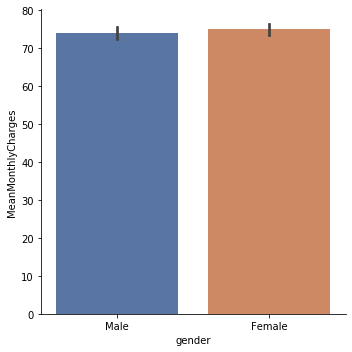

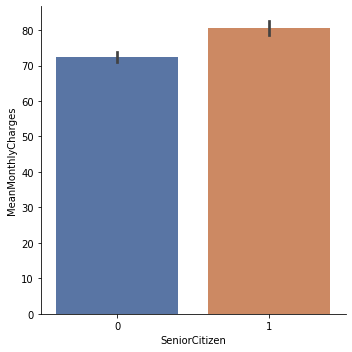

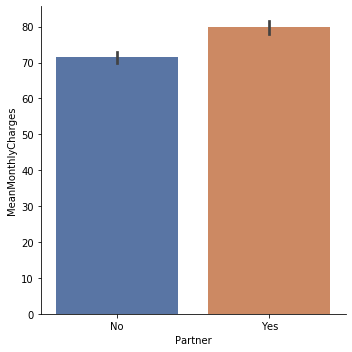

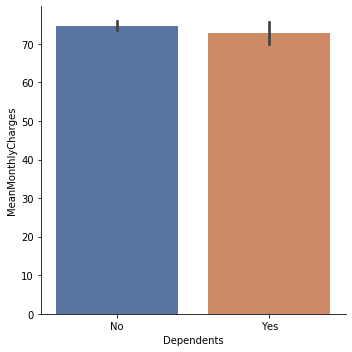

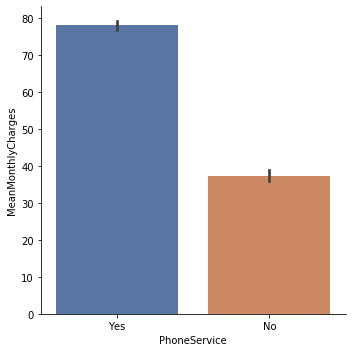

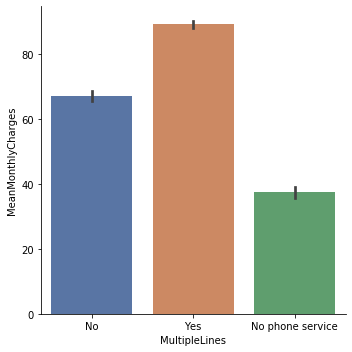

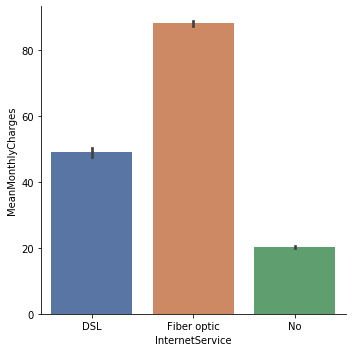

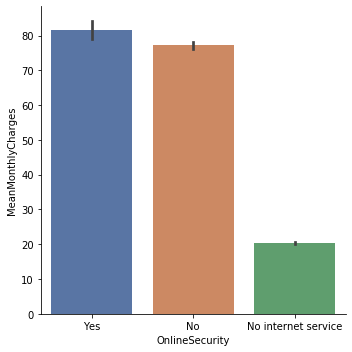

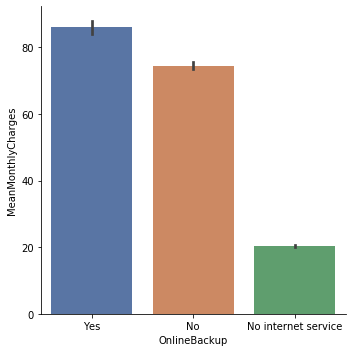

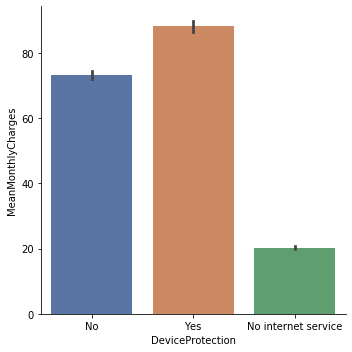

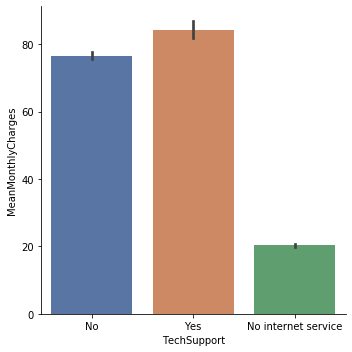

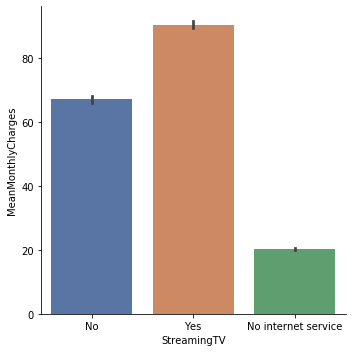

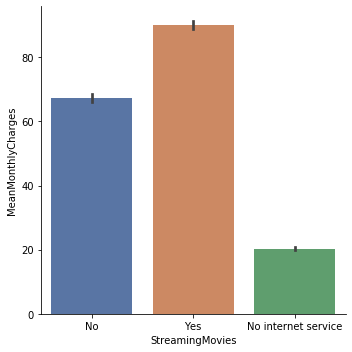

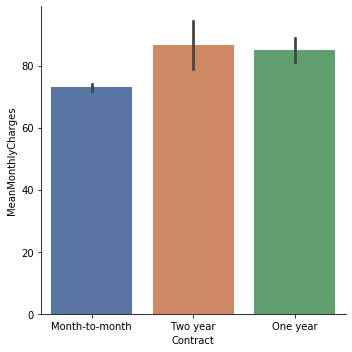

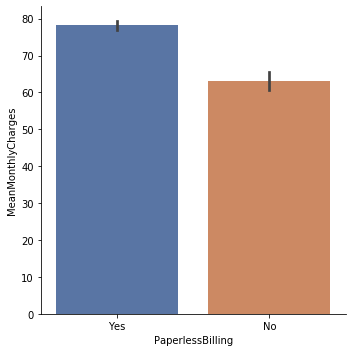

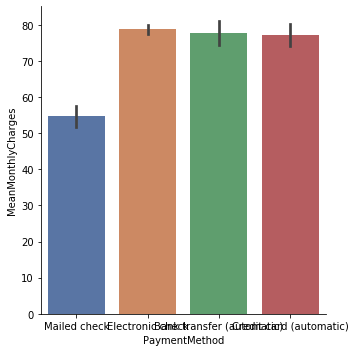

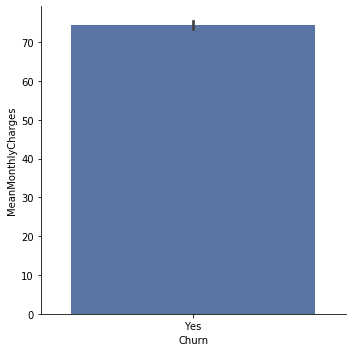

In [7]:

functions.plot_float_vs_objects(data_sorted, "MeanMonthlyCharges")


## Distribution analysis.
### Now we do the same as the previous part but for the distribution of continous float columns.
    

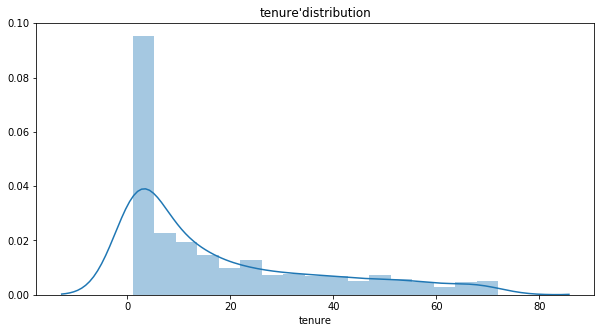

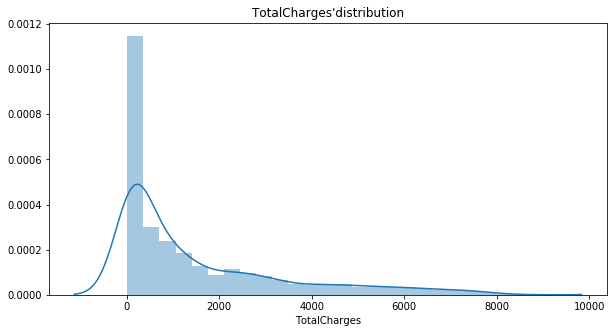

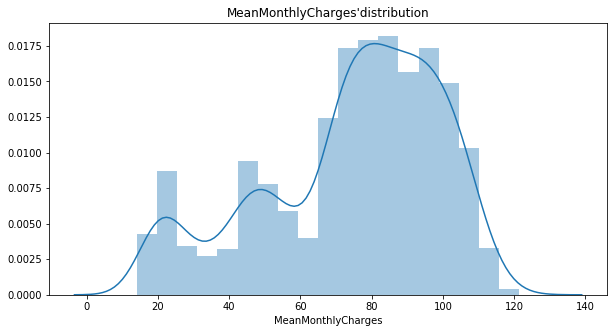

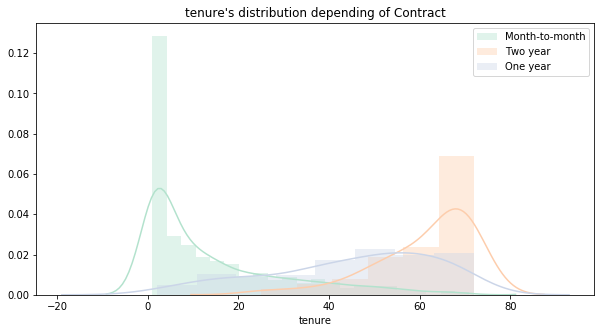

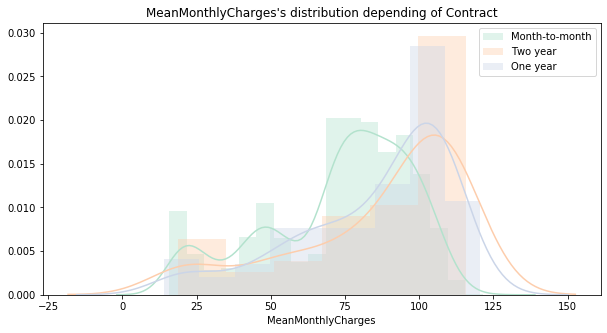

In [8]:
    functions.plot_distribution(data_sorted, "tenure")
    functions.plot_distribution(data_sorted, "TotalCharges")
    functions.plot_distribution(data_sorted, "MeanMonthlyCharges")

    functions.plot_distribution_by(data_sorted, "tenure", "Contract")
    functions.plot_distribution_by(data_sorted, "MeanMonthlyCharges", "Contract")




## Convert string to int.
### In order to be able to use this data in some algorithms we need to convert the object columns into float colums. To de so, we replace each differant choice with an interger.

In [9]:
   data_toint = functions.string_to_int(data_sorted)



## Correlation analysis.
### In order to identify the most important features, we performed a correlation analysis. We can decuce that the correlated options could be a good choice to create pack offers. And also that uncorrelated ones are good candidates for classification.
    

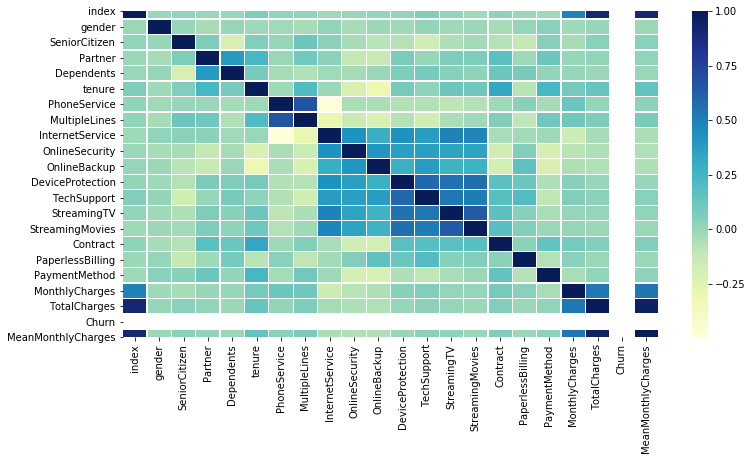

In [10]:
    functions.plot_correlation(data_toint)

## data statistical description

In [11]:


numeric_data_description = data_cleaned.describe(include=['number'])
print(numeric_data_description)

object_data_description = data_cleaned.describe(include=['object'])
print(object_data_description)

NameError: name 'data_cleaned' is not defined

## See the distribution of the tenure

Text(0, 0.5, 'Sum of clients')

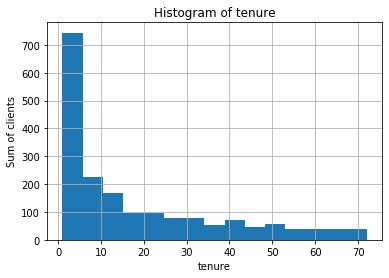

In [12]:

data_sorted['tenure'].hist(bins=15)
plt.title("Histogram of tenure")
plt.xlabel('tenure')
plt.ylabel('Sum of clients')


## See the distribution of the tenure and monthly charge

In [13]:

sns.jointplot(x=data_cleaned.tenure, y=data_cleaned.MonthlyCharges)
sns.jointplot(x=data_cleaned.tenure, y=data_cleaned.MonthlyCharges, kind='kde')
#plt.title("Density plot of the tenure and the monthly charge")

NameError: name 'data_cleaned' is not defined

## Binning the data per loyalty

In [ ]:
 
bins = np.array([0, 10, 45, data_cleaned['tenure'].max()])
group_names = ['New', 'Loyal', 'Very Loyal']
labels = pd.cut(data_cleaned['tenure'], bins, labels=group_names)

## Grouping the data by labels and gender

In [ ]:

grouped = data_cleaned.groupby([labels, 'gender'])
Gender_loyalty = grouped.size().unstack()
fig = plt.figure()
Gender_loyalty.plot.bar(title='Loyalty by gender')
print(Gender_loyalty)

### From this plot one can observe the distribution of clients within the loyalty classification made above 

### Getting all the services into one plot 
### Normalize the services for their binary value 
### Setting bool to int

In [ ]:


My_dict = {'Yes': 1, 'No': 0}
data_cleaned['PhoneService_int'] = data_cleaned['PhoneService'].replace("Yes", 1).replace("No", 0)

grouped2 = data_sorted.groupby(labels)
PhoneService_norm = grouped2['PhoneService_int'].sum()/grouped2.size()
normed_infos = pd.DataFrame(PhoneService_norm, columns=['Has_PhoneService'])

## Getting the proportion on people with internet service

In [ ]:

My_dict2 = {'DSL': 1, 'Fiber optic': 1, 'No': 0}
data_cleaned['InternetService_int'] = data_cleaned['InternetService'].map(My_dict2)

InternetService_norm = grouped2['InternetService_int'].sum()/grouped2.size()
normed_infos['Has_InternetService'] = InternetService_norm


props = {
    'title': 'Percent of clients who have different services per loyalty',
    'ylabel': 'Normalized "Yes"'
}


ax = fig.add_subplot(1, 1, 1)
ax.set(**props)
ax.legend(loc='best')
normed_infos.plot.bar(ax=ax, rot=30)

## Analyze the internet services

In [14]:

data_cleaned_with_internet = data_cleaned[data_cleaned['InternetService'] != 'No']
labels2 = pd.cut(data_cleaned_with_internet['tenure'], bins, labels=group_names)
grouped3 = data_cleaned_with_internet.groupby(labels2)

internet_services_df = normed_infos.copy()

for x in data_cleaned.columns[9:15]:
    new_col = x + '_int'
    data_cleaned_with_internet[new_col] = data_cleaned_with_internet[x].map(My_dict)
    
    current_norm = grouped3[new_col].sum()/grouped3.size()
    internet_services_df['Has_'+x] = current_norm
    

internet_services_df.drop(columns=['Has_InternetService', 'Has_PhoneService'], inplace=True)

props2 = {
    'title': 'Percent of clients who have different internet services per loyalty',
    'ylabel': 'Normalized "Yes"'
}


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set(**props)
ax.legend(loc='best')
internet_services_df.plot.bar(ax=ax, rot=30)

NameError: name 'data_cleaned' is not defined

In [15]:
# money spent per loyalty
data_cleaned['Labels'] = labels
fig = plt.figure()
sns.barplot(x='Labels', y='MonthlyCharges', data=data_cleaned)
sns.set(style="whitegrid")

NameError: name 'labels' is not defined

## money spent as a function of loyalty and internet connection

In [16]:

sns.catplot(x='Labels', y='MonthlyCharges', hue='InternetService', kind="bar", data=data_cleaned)
sns.set(style="whitegrid")

NameError: name 'data_cleaned' is not defined

## Other representation

In [17]:

sns.catplot(x='Labels', y='MonthlyCharges', hue='gender', kind="bar", data=data_cleaned)
sns.set(style="whitegrid")

NameError: name 'data_cleaned' is not defined

# Do men/women spend more money ?

In [18]:

sns.catplot(x='Labels', y='MonthlyCharges', hue='gender', data=data_cleaned)
sns.set(style="whitegrid")

NameError: name 'data_cleaned' is not defined


# does the method of payment affect the monthly charge of the customers

In [19]:

sns.catplot(x='Labels', y='MonthlyCharges', hue='PaymentMethod', kind="bar", data=data_cleaned)
sns.set(style="whitegrid")

NameError: name 'data_cleaned' is not defined

# the monthly charge versus the senior state

In [20]:

sns.catplot(x='Labels', y='MonthlyCharges', hue='SeniorCitizen', kind="bar", data=data_cleaned)
sns.set(style="whitegrid")

NameError: name 'data_cleaned' is not defined